## Загрузим наш аудиофайл:

In [1]:
%pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 509.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0
    Uninstalling librosa-0.10.0:
      Successfully uninstalled librosa-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install nemo_toolkit[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
%pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 598.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams ['figure.figsize'] = [10, 7]

audio_path = "/kaggle/input/audio-file/1.wav"

audio, sr = librosa.load(audio_path, sr=None)

## Визуализируем загруженный файл:

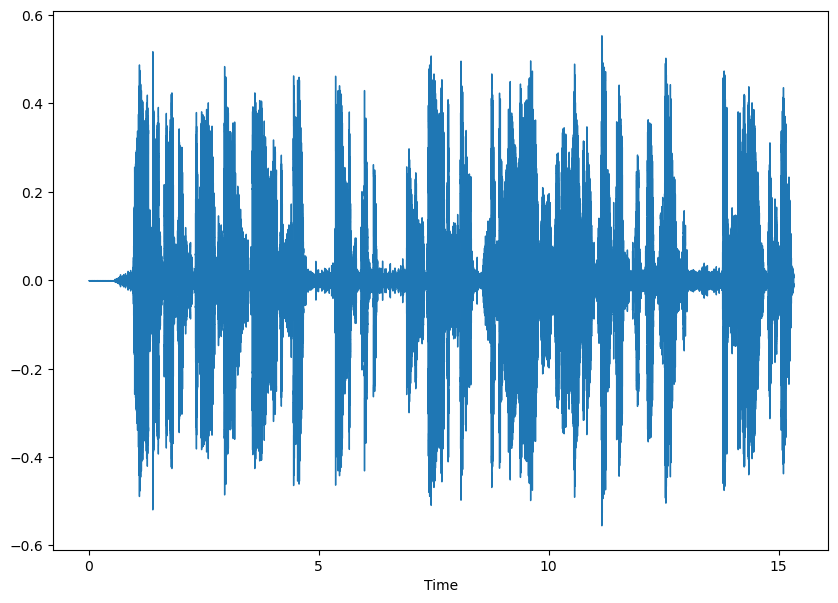

In [5]:
wave_plot_basic = librosa.display.waveshow(audio, sr=sr)
plt.show()

## Для отрисовки спектрограммы проведем предобработку сигнала:

In [6]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

## Спектрограмма:

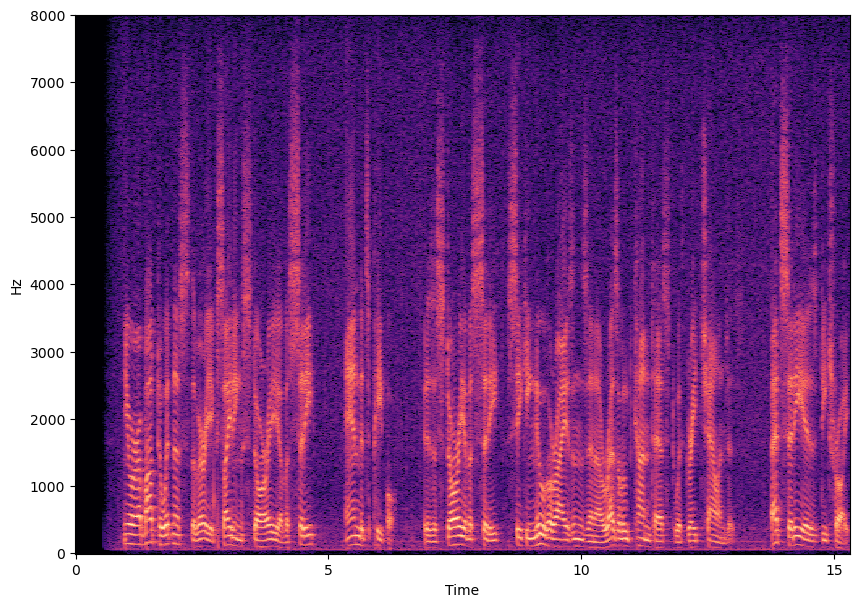

In [7]:
spectrogram_basic = librosa.display.specshow(D, sr=sr, y_axis='linear', x_axis='time')

## mel-спектрограмма:

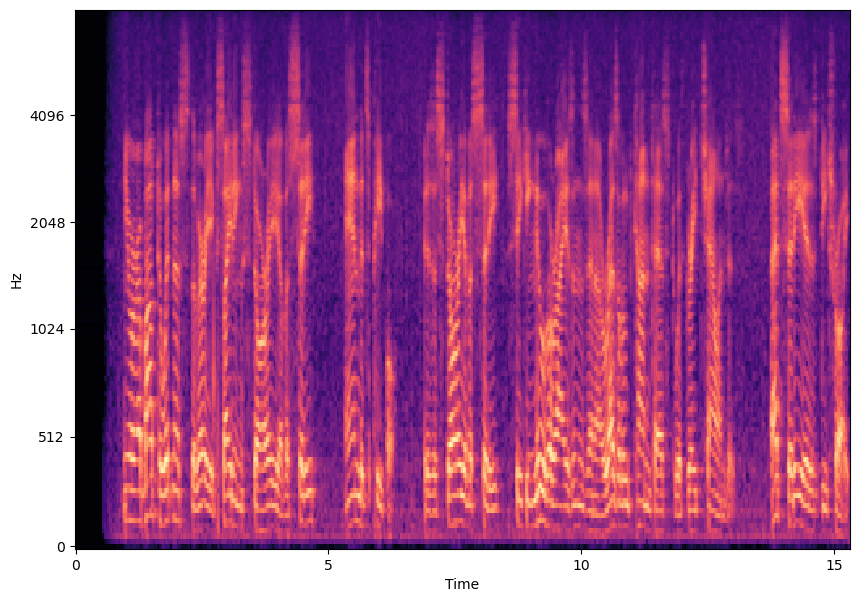

In [8]:
S = librosa.feature.melspectrogram(S=D, sr=sr)
mel_plt_basic = librosa.display.specshow(S, sr=sr, y_axis='mel', x_axis='time')

## mfccs-спектрограмма:

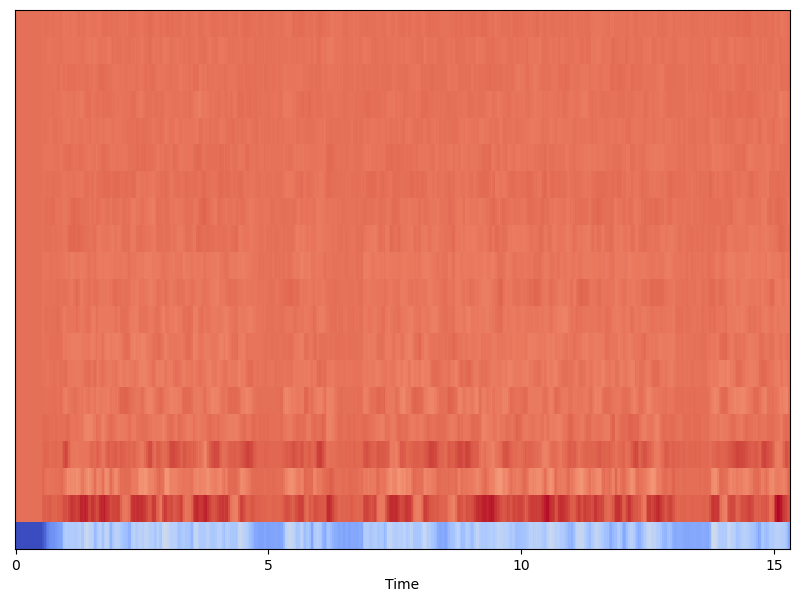

In [9]:
mfccs = librosa.feature.mfcc(S=S, sr=sr)
mfccs_plt_basic = librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Добавим к нашему файлу аугментацию:

In [10]:
from audiomentations import Compose, AddGaussianNoise, Gain

augment = Compose([AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
                   Gain(min_gain_in_db=-10, max_gain_in_db=20, p=0.33)])

augmented_audio = augment(samples=audio, sample_rate=sr)

## Созраним преобразованный файл:

In [11]:
from scipy.io.wavfile import write

augmented_path = '/kaggle/working/1_augmented.wav'
write(augmented_path, sr, augmented_audio)

## Визуализируем полученный результат:

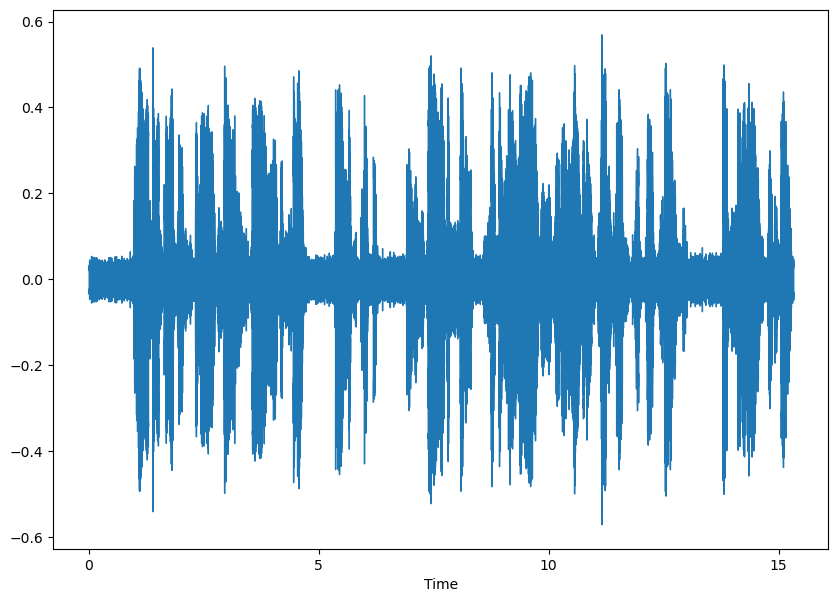

In [12]:
wave_plot_augmented = librosa.display.waveshow(augmented_audio, sr=sr)
plt.show()

In [13]:
D_augmented = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_audio)), ref=np.max)

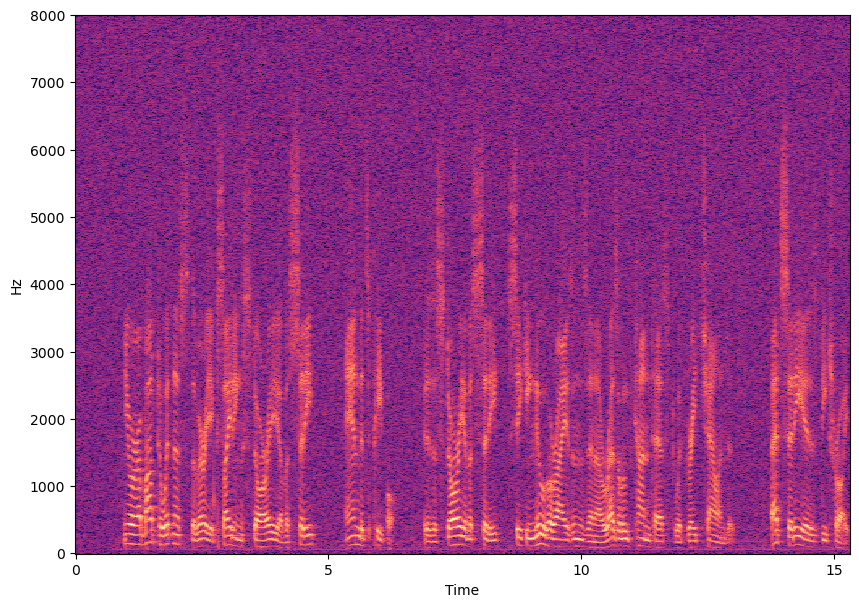

In [14]:
spectrogram_augmented = librosa.display.specshow(D_augmented, sr=sr, y_axis='linear', x_axis='time')

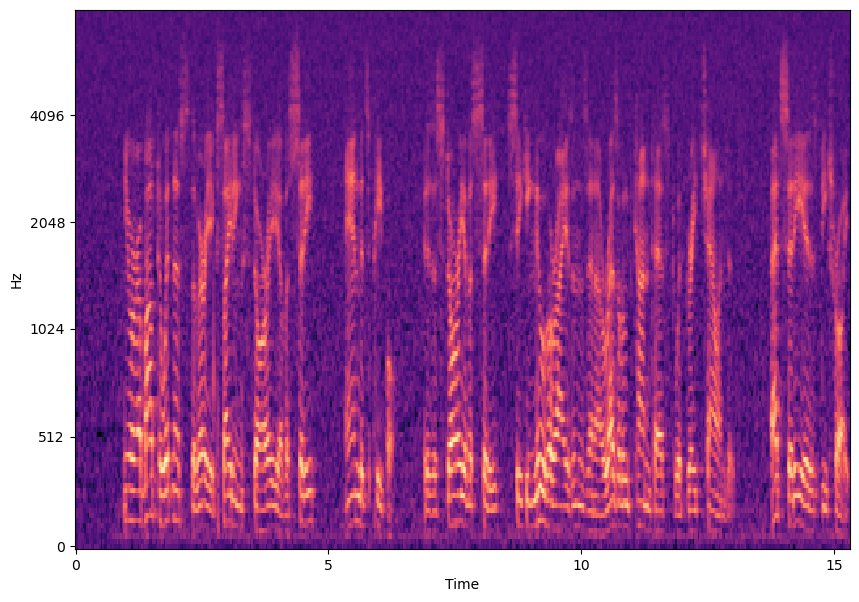

In [15]:
S_augmented = librosa.feature.melspectrogram(S=D_augmented, sr=sr)
mel_plt_augmented = librosa.display.specshow(S_augmented, sr=sr, y_axis='mel', x_axis='time')

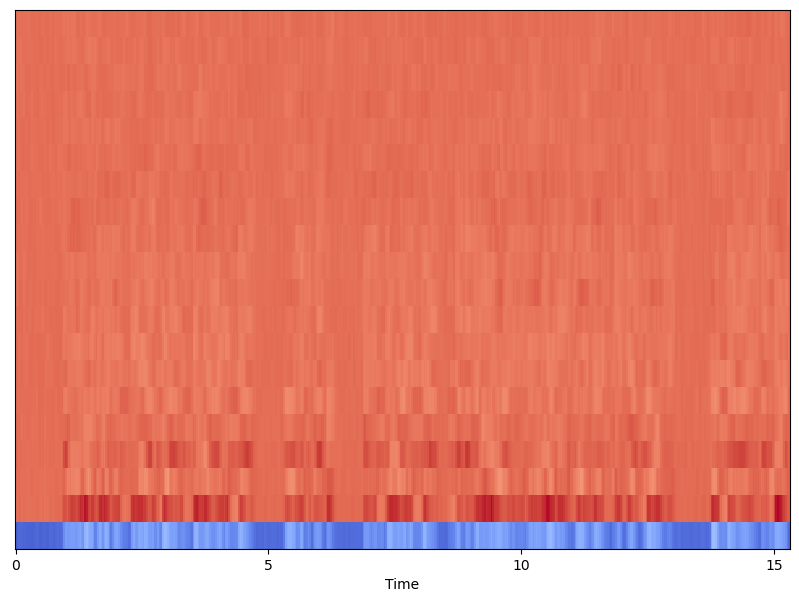

In [16]:
mfccs_augmented = librosa.feature.mfcc(S=S_augmented, sr=sr)
mfccs_plt_augmented = librosa.display.specshow(mfccs_augmented, sr=sr, x_axis='time')

## Наглядное сравнение спектрограмм файлов:

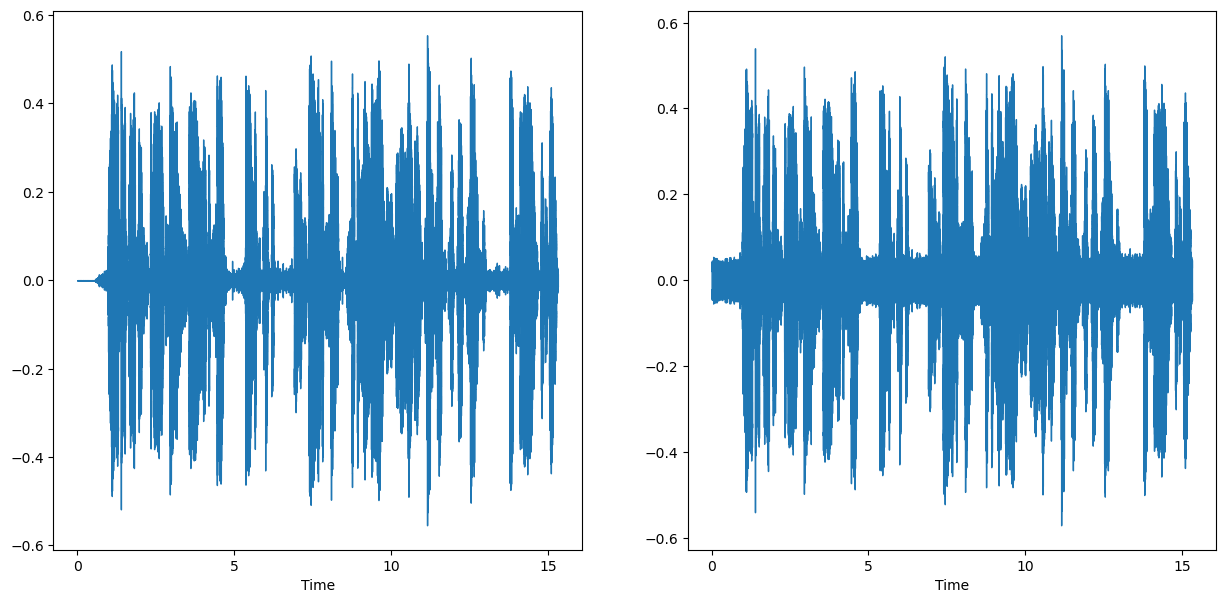

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
librosa.display.waveshow(audio, sr=sr, ax=ax[0])
librosa.display.waveshow(augmented_audio, sr=sr, ax=ax[1])

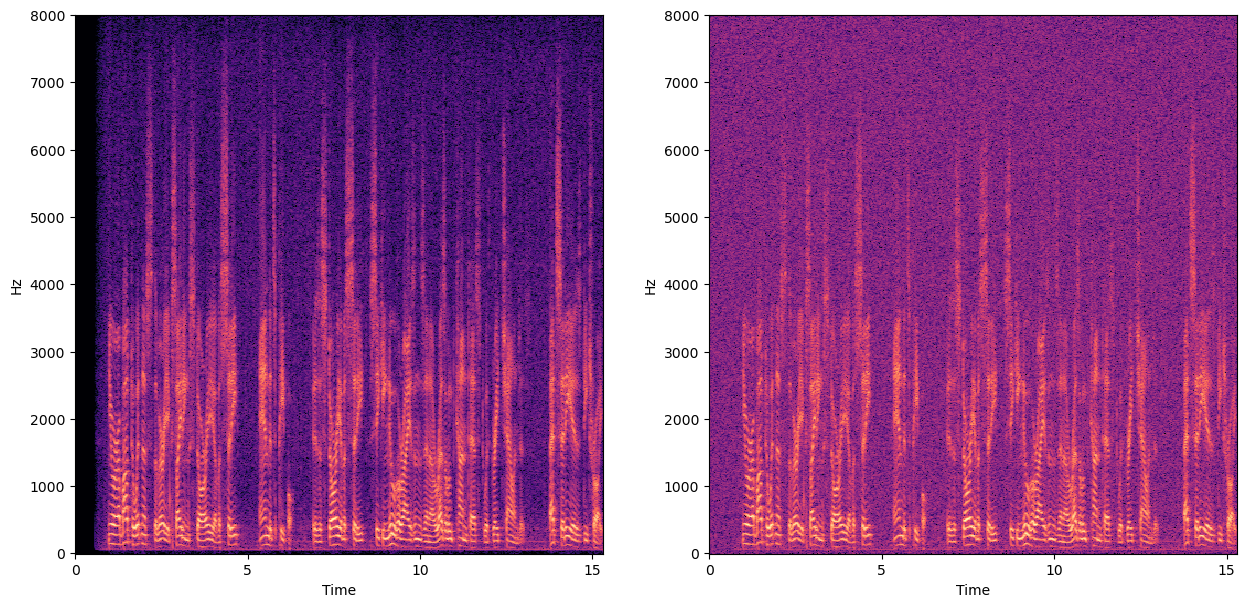

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
librosa.display.specshow(D, sr=sr, y_axis='linear', x_axis='time', ax=ax[0])
librosa.display.specshow(D_augmented, sr=sr, y_axis='linear', x_axis='time', ax=ax[1])

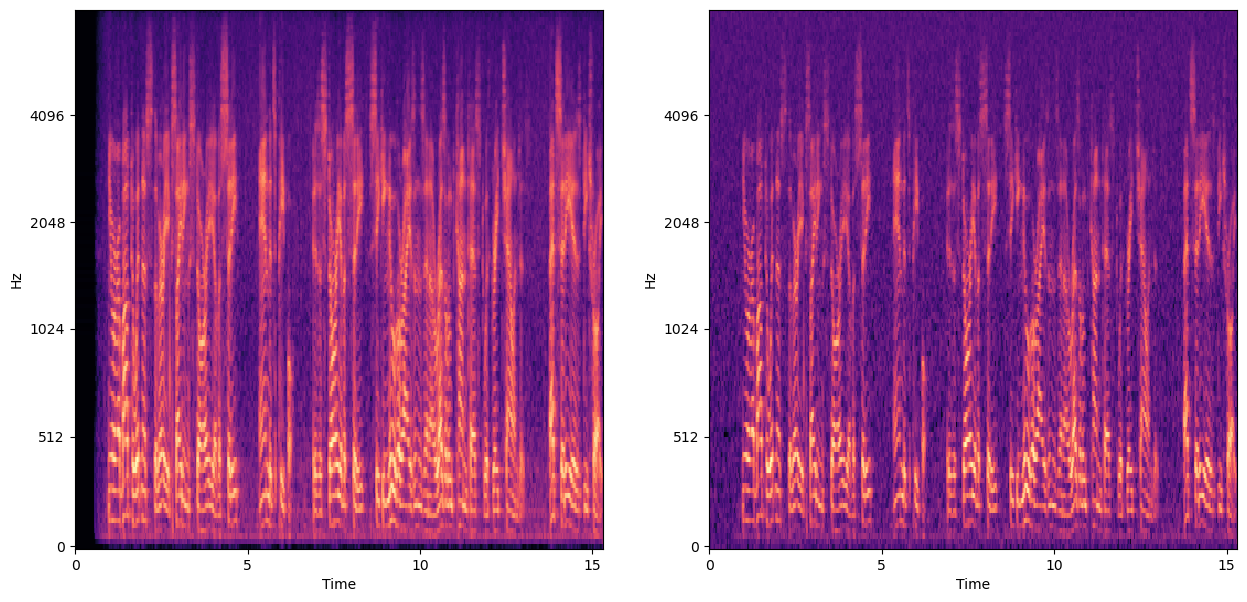

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
librosa.display.specshow(S, sr=sr, y_axis='mel', x_axis='time', ax=ax[0])
librosa.display.specshow(S_augmented, sr=sr, y_axis='mel', x_axis='time', ax=ax[1])

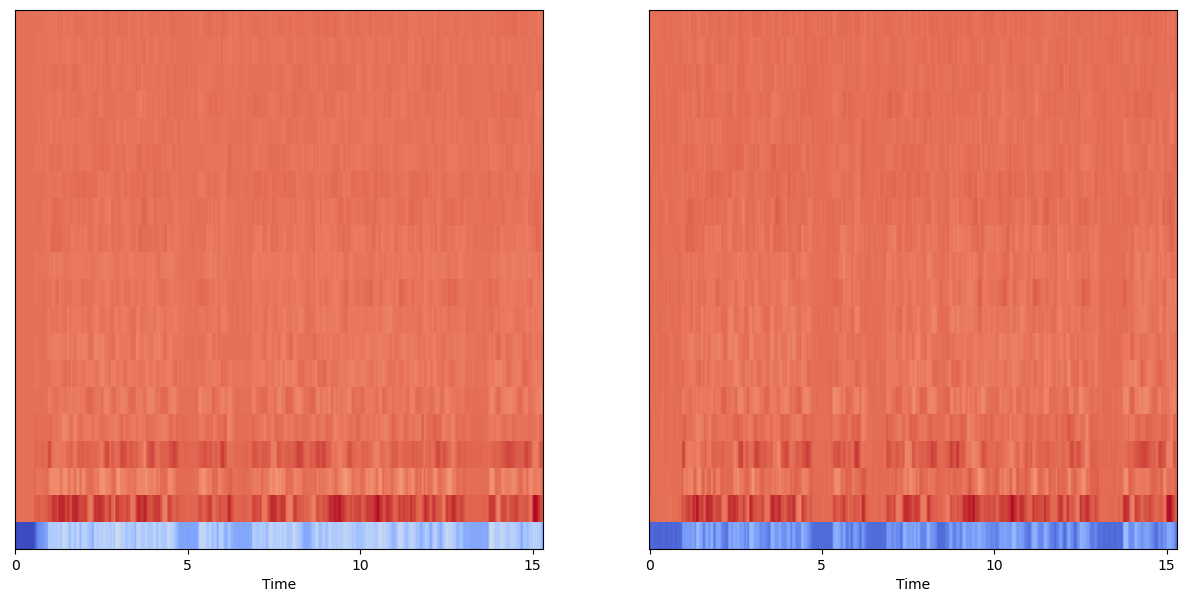

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=ax[0])
librosa.display.specshow(mfccs_augmented, sr=sr, x_axis='time', ax=ax[1])

## Распознавание речи на базе NeMo:

In [21]:
import nemo.collections.asr as nemo_asr
model = nemo_asr.models.ASRModel.from_pretrained(model_name="stt_en_citrinet_256")
texts = model.transcribe(paths2audio_files=[audio_path, augmented_path])

[NeMo W 2023-03-05 16:00:45 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2023-03-05 16:00:46 nemo_logging:349] /opt/conda/lib/python3.7/site-packages/torch/jit/annotations.py:299: UserWarning: TorchScript will treat type annotations of Tensor dtype-specific subtypes as if they are normal Tensors. dtype constraints are not enforced in compilation either.
      warnings.warn("TorchScript will treat type annotations of Tensor "
    


[NeMo I 2023-03-05 16:00:46 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_en_citrinet_256/versions/1.0.0rc1/files/stt_en_citrinet_256.nemo to /root/.cache/torch/NeMo/NeMo_1.14.0/stt_en_citrinet_256/91a9cc5850784b2065e8a0aa3d526fd9/stt_en_citrinet_256.nemo
[NeMo I 2023-03-05 16:00:53 common:912] Instantiating model from pre-trained checkpoint
[NeMo I 2023-03-05 16:00:55 mixins:172] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2023-03-05 16:00:55 modelPT:143] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: null
    sample_rate: 16000
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    use_start_end_token: false
    
[NeMo W 2023-03-05 16:00:55 modelPT:150] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: null
    sample_rate: 16000
    batch_size: 32
    shuffle: false
    use_start_end_token: false
    
[NeMo W 2023-03-05 16:00:55 modelPT:156] Please call the ModelPT.setup_test_data() or ModelPT.setup_multiple_test_data() method and provide a va

[NeMo I 2023-03-05 16:00:55 features:267] PADDING: 16
[NeMo I 2023-03-05 16:00:56 save_restore_connector:243] Model EncDecCTCModelBPE was successfully restored from /root/.cache/torch/NeMo/NeMo_1.14.0/stt_en_citrinet_256/91a9cc5850784b2065e8a0aa3d526fd9/stt_en_citrinet_256.nemo.


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

## Исходный текст:

In [22]:
f = open('/kaggle/input/audio-file/1.txt', 'r')
reference = f.read()
print(reference)

you are about to witness the very exciting story of a city and its people it is a story of a city seeking new horizons in a resolute contest with great challenges that city is detroit


## Определенный моделью текст:

In [23]:
print(f"Исходный аудиофайл: {texts[0]}")
print(f"Зашумленный аудиофайл: {texts[1]}")

Исходный аудиофайл: you are about to witness the very exciting story of a city and its people it is a story of a city seeking new horizons in a resolute contest with great challenges that city is detroit
Зашумленный аудиофайл: you are about to witness the very exciting story of a city and its people it is a story of a city seeking new horizons in a resolute contest with great challenges that city is detroit


## Подсчет WER

In [24]:
from evaluate import load

references = [reference, reference]
wer = load("wer")
wer_score = wer.compute(predictions=texts, references=references)
print(f"wer_score= {wer_score}")

wer_score= 0.0
